# <center> BeakerX </center>

## <center> Volker Bäcker </center>

### <center> 27.01.2020 </center>

# <center> BeakerX features </center>

1. polyglot
1. EasyForm widgets
1. interactive plots
1. interactive tables
1. spark support
1. instant publication
1. java support

# <center> BeakerX history </center>

* beaker-notebook
> * independant notebook implementation

* beakerX
> * re-implementation as a jupyter-notebook extension

# <center> Polyglot - introduction </center>

* different cells in the same notebook can execute different languages
* data can be exchanged between languages

In [ ]:
beakerx.myValue = 6

In [ ]:
%%java
Integer a = (Integer)NamespaceClient.getBeakerX().get("myValue");
NamespaceClient.getBeakerX().set("myValue", a+1);

In [ ]:
%%kotlin
beakerx["myValue"]

# <center> Polyglot example </center>

* use python to download an image from omero
* use groovy to run an ImageJ-macro on it

In [1]:
%%python
import ipywidgets as widgets
hosts = ["workshop.openmicroscopy.org", "omero.mri.cnrs.fr"]
port = 4064
CD_host = widgets.Dropdown(
       options=hosts,
       value=hosts[0],
       description='host:')
CD_port = widgets.IntText(
    value=port,
    description='port:',
) 
CD_top = widgets.HBox([CD_host, CD_port])
CD_user = widgets.Text(
    value = 'user',
    description = 'user:'
)
CD_password = widgets.Password(
    value = '',
    description = 'password:'
)
CD = widgets.VBox([CD_top, CD_user, CD_password])
display(CD)

In [2]:
%%python
from omero.gateway import BlitzGateway
conn = BlitzGateway(CD_user.value,
                    CD_password.value,
                    host=CD_host.value, port=CD_port.value)
conn.connect()

True

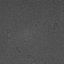

In [3]:
%%python
from IPython.display import Image
from PIL import Image as pImage
from io import BytesIO, StringIO

userID = conn.getUser().getId()
groupID = conn.getEventContext().groupId
projects = list(conn.getObjects("Project",
                               opts={'owner': userID,
                                     'group': groupID,
                                     'order_by': 'lower(obj.name)'}))

projectNames = [project.getName() for project in projects]
projectIDs = [project.getId() for project in projects]
projectTupels = list(zip(projectNames, projectIDs))
datasetNames = list([dataset.getName() for dataset in projects[0].listChildren()])
datasetIDs = list([dataset.getId() for dataset in projects[0].listChildren()])
datasetTupels = list(zip(datasetNames, datasetIDs))
datasets = list(projects[0].listChildren())
images = list(datasets[0].listChildren())
imageNames = [image.getName() for image in images]
imageIDs = [image.getId() for image in images]
imageTupels = list(zip(imageNames, imageIDs))
BD_project = widgets.Dropdown(
       continuous_update=True,
       options=projectTupels,
       value=projectTupels[0][1],
       description='project:')
BD_dataset = widgets.Dropdown(
       options=datasetTupels,
       value=datasetTupels[0][1],
       description='dataset:')
BD_image = widgets.Select(
       options=imageTupels,
       value=imageTupels[0][1],
       description='image:') 
img_data = images[0].getThumbnail()
thumb = Image(img_data, width=200, height=200)
#BD_thumbnail = widgets.Image(
#    value=img_data,
#    format='jpg',
#    width=150,
#    height=150,
#)
BD_out = widgets.Output(layout={'border': '1px solid black'})
BD_top = widgets.HBox([BD_project, BD_dataset])
BD_bottom = widgets.HBox([BD_image, BD_out])
BD_all = widgets.VBox([BD_top, BD_bottom])
def on_project_change(change):
    global datasets
    datasetNames = list([dataset.getName() for dataset in projects[change['new']].listChildren()])
    datasetIDs = list([dataset.getId() for dataset in projects[change['new']].listChildren()])
    datasetTupels = list(zip(datasetNames, datasetIDs))
    datasets = list(projects[change['new']].listChildren())
    BD_dataset.options = datasetTupels
    BD_dataset.value = datasetTupels[0][1]
def on_dataset_change(change):
    global datasets, images
    imageNames = list([image.getName() for image in datasets[change['new']].listChildren()])
    imageIDs = list([image.getId() for image in datasets[change['new']].listChildren()])
    imageTupels = list(zip(imageNames, imageIDs))
    images = list(datasets[change['new']].listChildren())
    BD_image.options = imageTupels
    BD_image.value = imageTupels[0][1]
def on_image_change(change):
    global images, thumb, img_data
    image = images[change['new']]
    img_data = image.getThumbnail()
    thumb = Image(img_data, width=200, height=200)
    BD_out.layout.object_fit = 'contain'
    BD_out.layout.justify_content = 'center'
    BD_out.clear_output()
    with BD_out:
        display(BD_all)
        display(thumb)

BD_project.observe(on_project_change, names="index")
BD_dataset.observe(on_dataset_change, names="index")
BD_image.observe(on_image_change, names="index")
display(BD_all)
with BD_out:
    display(thumb)

In [ ]:
%%python
from PIL import Image as pImage
from IPython.display import Image
from io import BytesIO
from base64 import b64encode
image = conn.getObject("Image", 717630)
img_data = image.getThumbnail()
pil_im = pImage.open(BytesIO(img_data))
b = BytesIO()  
pil_im.save(b, format='png')
thumb = Image(img_data, width=200, height=200)

display(thumb)
thumb.reload()
widgets.Image(
    value=thumb,
    format='jpg',
    width=150,
    height=150,
)